# Sentiment analysis from:
### https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6

## and
### https://realpython.com/python-nltk-sentiment-analysis/:  nltk has a pre-trained sentiment analyzer

In [1]:
!conda install -y -c https://conda.anaconda.org/conda-forge wordcloud

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
sentimentOutputLocation = "C:\\Users\\mlaux\\OneDrive - Ventera Corporation\\Documents\\02.Projects\\04.HAIV_vstart\\005.Sentiment\\vstartSentiments.csv"

In [3]:
# from https://towardsdatascience.com/cleaning-and-extracting-json-from-pandas-dataframes-f0c15f93cb38:
def clean_json2(x):

    # store values
    ls = []

    # loop through the list f dictionaries
    for y in range(len(x[0])):

        # Access each key and value in each dictionary
        for k, v in x[0][y].items():
            # append column names to ls
            ls.append(str(k)+ "_" +str(v))
   
    # create a new column or change 0 to 1 if keyword exists
    for z in range(len(ls)):

        # If column not in the df columns then make a new column and assign zero values while changing the current row to 1
        if ls[z] not in df.columns:
            df[ls[z]] = 0
            df[ls[z]].iloc[x.name] = 1
        else:
            df[ls[z]].iloc[x.name] = 1
    return

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk.sentiment import SentimentIntensityAnalyzer

In [5]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mlaux\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
stopWords = [
    "a",
"about",
"actually",
"almost",
"also",
"although",
"always",
"am",
"an",
"and",
"any",
"are",
"as",
"at",
"be",
"became",
"become",
"but",
"by",
"can",
"could",
"did",
"do",
"does",
"each",
"either",
"else",
"for",
"from",
"had",
"has",
"have",
"hence",
"how",
"i",
"if",
"in",
"is",
"it",
"its",
"just",
"may",
"maybe",
"me",
"might",
"mine",
"must",
"my",
"mine",
"must",
"my",
"neither",
"nor",
"not",
"of",
"oh",
"ok",
"when",
"where",
"whereas",
"wherever",
"whenever",
"whether",
"which",
"while",
"who",
"whom",
"whoever",
"whose",
"why",
"will",
"with",
"within",
"without",
"would",
"yes",
"yet",
"you",
"your"
]

In [7]:
corpusCsvLocation = "C:\\Users\\mlaux\\OneDrive - Ventera Corporation\\Documents\\02.Projects\\04.HAIV_vstart\\002.WebCapture\\vstartCorpus.csv"


In [8]:
dfCorpus = pd.read_csv(corpusCsvLocation, sep = "|")
dfCorpus["text"] = dfCorpus["title"] + " " + dfCorpus["what"] + " " + dfCorpus["why"]
dfCorpus

,index_label,page,title,what,why,text
0,0,https://www.vstart.dev/play/1,Contextual Inquiry,Team members unobtrusively observe participan...,To collect information about the “context of ...,Contextual Inquiry Team members unobtrusivel...
1,1,https://www.vstart.dev/play/2,Design Kit,Design kits are often known as a UI Kit or us...,There are several reasons to create a design ...,Design Kit Design kits are often known as a ...
2,2,https://www.vstart.dev/play/3,Ideation and Brainstorming,Ideation is a creative process used to genera...,Ideation is the bridge between the problem sp...,Ideation and Brainstorming Ideation is a cre...
3,3,https://www.vstart.dev/play/4,Minimum Viable Product,A Minimum Viable Product (MVP) is a version o...,Teams should create MVP in a manner that allo...,Minimum Viable Product A Minimum Viable Prod...
4,4,https://www.vstart.dev/play/5,Prioritization,Prioritization is an essential activity of pr...,"Organizational, product, and customer priorit...",Prioritization Prioritization is an essentia...
5,5,https://www.vstart.dev/play/6,Product Backlog Management,A Product Backlog is an ordered list of all t...,Managing the product backlog is important for...,Product Backlog Management A Product Backlog...
6,6,https://www.vstart.dev/play/7,Product Backlog Refinement,Product backlog refinement (PFR) is a continu...,PFRs get the targeted user stories ready for ...,Product Backlog Refinement Product backlog r...
7,7,https://www.vstart.dev/play/8,Project Kickoff,Whether for a short-term technical challenge ...,The kickoff is the moment the entire team is ...,Project Kickoff Whether for a short-term tec...
8,8,https://www.vstart.dev/play/9,Research Readout,A Research Readout is a summary of your resea...,The reason for creating research readouts is ...,Research Readout A Research Readout is a sum...
9,9,https://www.vstart.dev/play/10,Personas,Personas are fictional characters that repres...,Creating personas helps understand your users...,Personas Personas are fictional characters t...


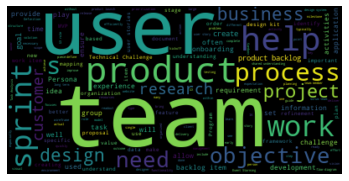

In [9]:
# Create stopword list:
stopwords = set(stopWords)
stopwords.update(["br", "href"])
a = dfCorpus["text"].tolist()
textt = " ".join(text for text in a)
wordcloud = WordCloud(stopwords=STOPWORDS).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [10]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Wow, NLTK is really powerful!")
# dfCorpus["sent"] = pd.eval("sia.polarity_scores(dfCorpus.text)")
dfCorpus["sentScoreText"] = dfCorpus["text"].apply(lambda x: sia.polarity_scores(x))
dfCorpus["sentScoreWhat"] = dfCorpus["what"].apply(lambda x: sia.polarity_scores(x))
dfCorpus["sentScoreWhy"] = dfCorpus["why"].apply(lambda x: sia.polarity_scores(x))

print("Original Shape", dfCorpus.shape)

json_cols = ["sentScore"]

# Loop over all columns and clean json and create new columns
for x in json_cols:
    dfCorpus[[x]].apply(clean_json2, axis=1)

print("New Shape", dfCorpus.shape)

In [11]:

textColumnList = {"text": "Text", "what": "What", "why": "Why"}

for colName in textColumnList.keys():
    dfCorpus[f"sentScore{textColumnList[colName]}_neg"] = dfCorpus[colName].apply(lambda x: sia.polarity_scores(x)["neg"])
    dfCorpus[f"sentScore{textColumnList[colName]}_neu"] = dfCorpus[colName].apply(lambda x: sia.polarity_scores(x)["neu"])
    dfCorpus[f"sentScore{textColumnList[colName]}_pos"] = dfCorpus[colName].apply(lambda x: sia.polarity_scores(x)["pos"])


In [12]:
dfCorpus.to_csv(sentimentOutputLocation, sep = "|")